In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [143]:
train = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-train.csv')
test = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-test.csv')


In [144]:
train = train.iloc[0]
test = test.iloc[0]

In [145]:
train = train.dropna()  
train = train.to_frame()
test = test.dropna()  
test = test.to_frame()

In [146]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [147]:
header_row_train = train.iloc[0]
header_row_test = test.iloc[0]
train = pd.DataFrame(train.values[1:], columns=header_row_train)
test = pd.DataFrame(test.values[1:], columns=header_row_test)
data = pd.concat([train, test], axis=0)
data = data.reset_index(drop=True)
data = data.drop(columns=['V1'])
data


,D1
0,1017.1
1,1019.3
2,1017.0
3,1019.2
4,1018.7
...,...
1015,2066.4
1016,2067.4
1017,2071.4
1018,2083.8


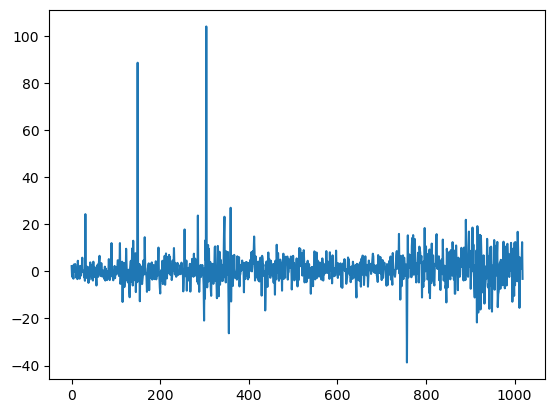

In [148]:
data = data.iloc[:,0]
first_diff = np.diff(data, n=1)
plt.plot(first_diff)

In [149]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result=adfuller(data)
    p_value = result[1]
    #labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    #for value,label in zip(result,labels):
        #print(label+' : '+str(value) )
    if p_value <= 0.05:
        print(f"The p-value of Dickey-Fuller test is {p_value}\nSo we reject the null hypothesis(Ho). Data is stationary")
    else:
        print(f"The p-value Dickey-Fuller test is {p_value}\nSo we accept the null hypothesis(Ho). Data is not stationary and we need to fix that to use ARIMA.")

adfuller_test(first_diff)

The p-value of Dickey-Fuller test is 0.0
So we reject the null hypothesis(Ho). Data is stationary


In [150]:
# Convert NumPy array to DataFrame
df = pd.DataFrame(first_diff, columns=['D1'])

zeros_row = pd.DataFrame(np.zeros((1, df.shape[1])), columns=df.columns)

# Concatenate the zeros row at the beginning of the DataFrame
df = pd.concat([zeros_row, df]).reset_index(drop=True)

# Output the DataFrame
df

,D1
0,0.0
1,2.2
2,-2.3
3,2.2
4,-0.5
...,...
1015,3.6
1016,1.0
1017,4.0
1018,12.4
